In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson, stats
import math

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2024-04-10 15:11:00--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.173, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094.1’

walmart_data.csv?16 100%[===================>]  21.96M  85.0MB/s    in 0.3s    

2024-04-10 15:11:01 (85.0 MB/s) - ‘walmart_data.csv?1641285094.1’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv('walmart_data.csv?1641285094')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#Detect Null values and Outliers

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
#conversion of categorical attributes to 'category

category=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[category]=df[category].astype('object')

In [ ]:
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


###Observations

- There are no missing values.
- There are 5891 unique users, and User_ID 1001680 is the highest count which means User_ID 1001680 is the highest buyer.
- There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product_ID.
- Out of 550,068 User_ID, 414,259 are Male, and rest are Female. This shows that there are a lot more purchases made by males compared to females.
- There are 7 unique age groups and most of the purchase belongs to age 26-35 group.
- There are 21 different Occupation that customers have when they make purchases. Occupation 4 is the one that most customers have..
- There are 3 unique City_Category and City_Category B have highest buyers.
- There 5 unique values for Stay_In_Current_City_Years and most are 1 year.
- Marital status unmarried contribute more in terms of the count for the purchase.
- There are 20 unique Product_Category and Product_Category 5 is the highest.
- The purchases vary a lot, with the smallest being 12 and the biggest being 23,961. On average, people spend around 9,264. Also, most purchases, around 75%, are 12,054 or less, showing that many purchases are below 12,000.

# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

### Observations

- 40% of the purchase done by aged 26-35
- Maximum percent of purchase done by city_category B.
- 75% of the users are Male and 25% are Female
- 60% Single, 40% Married
- Occupation like 0, 4, 7 has contributed more towards total purchase amount, and 1, 17 comes in mid contribution.
- Most users prefer staying in the current city for around 1 year (35%), followed by 2-3 years (18%). Both 0 and 4+ years account for approximately 15% each.
- Product_Category such as 1, 5, and 8 have made a more contribution to the overall purchase amount.


# Univariate Visual Analysis

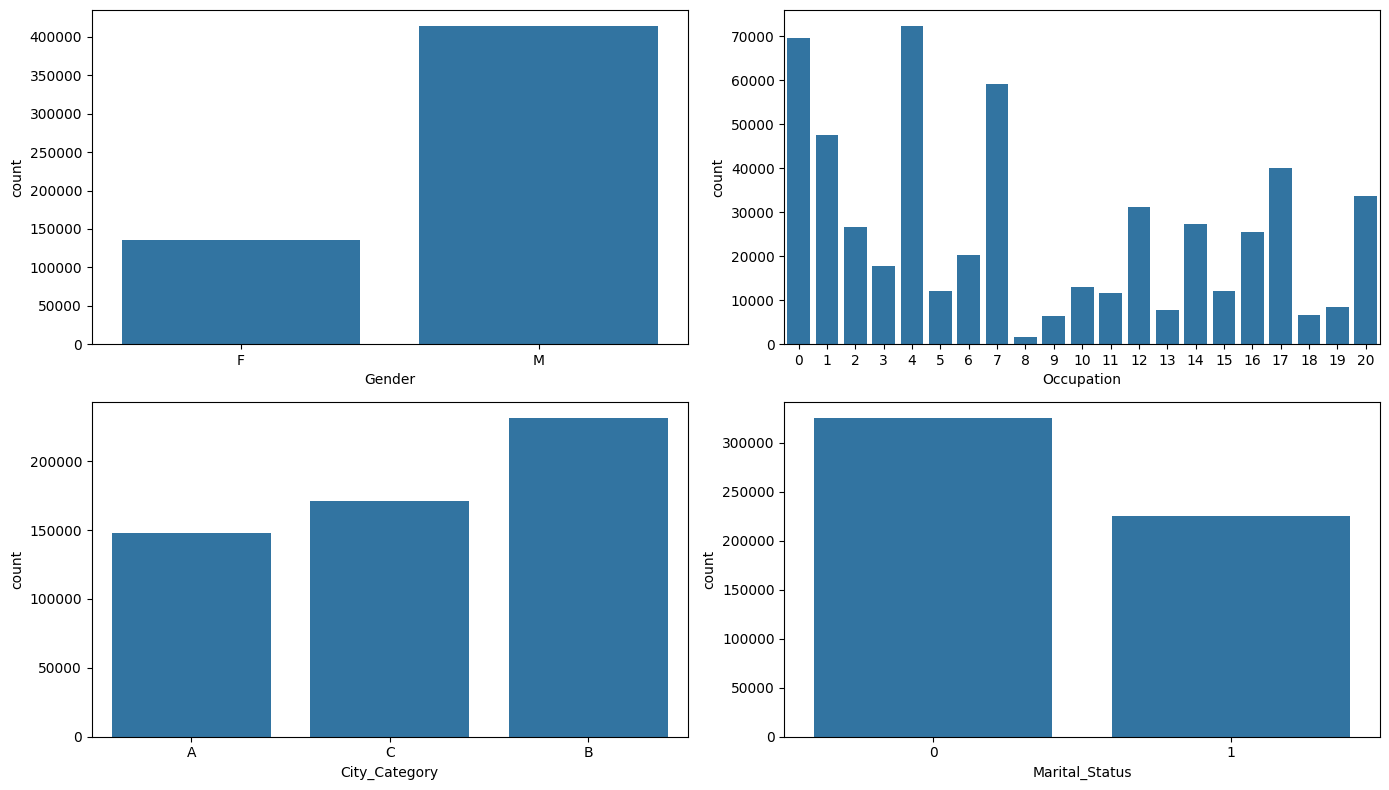

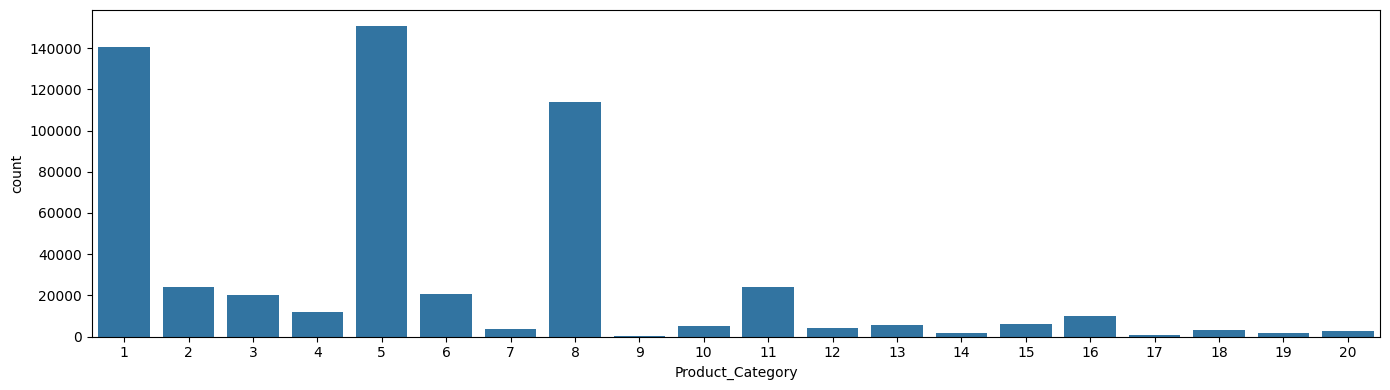

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(14,8))
sns.countplot(data=df, x='Gender', ax= axis[0,0])
sns.countplot(data=df, x='Occupation', ax= axis[0,1])
sns.countplot(data=df, x='City_Category', ax= axis[1,0])
sns.countplot(data=df, x='Marital_Status', ax= axis[1,1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,4))
sns.countplot(data=df, x='Product_Category')
plt.tight_layout()
plt.show()

### Observations

- Most of the users are Male
- There are 20 different types of Occupation and Product_Category
- More users belong to B City_Category
- More users are Single as compare to Married
- Product_Category - 1, 5 & 8 have highest purchasing frequency.

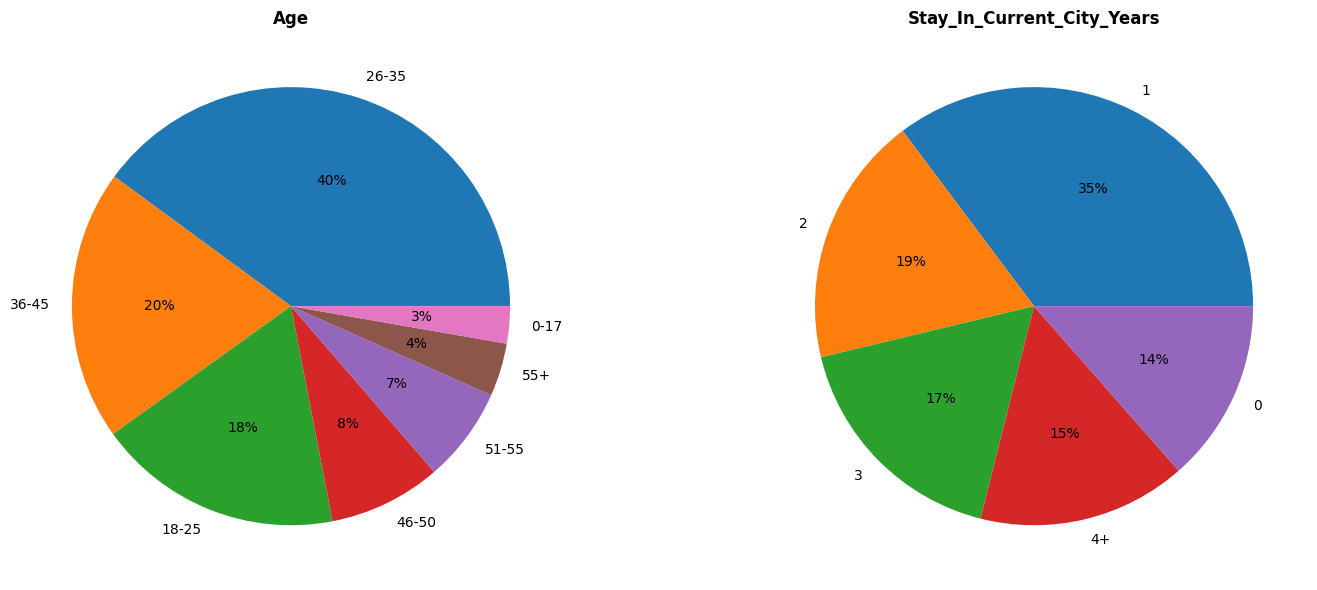

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
age_counts = df['Age'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%.0f%%')
plt.title('Age', fontweight='bold')

plt.subplot(1, 2, 2)
stay_counts = df['Stay_In_Current_City_Years'].value_counts()
plt.pie(stay_counts, labels=stay_counts.index, autopct='%.0f%%')
plt.title('Stay_In_Current_City_Years', fontweight='bold')

plt.tight_layout()
plt.show()

### Observations

- ~90% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years, 15% from 4 years+, 14% are new to city

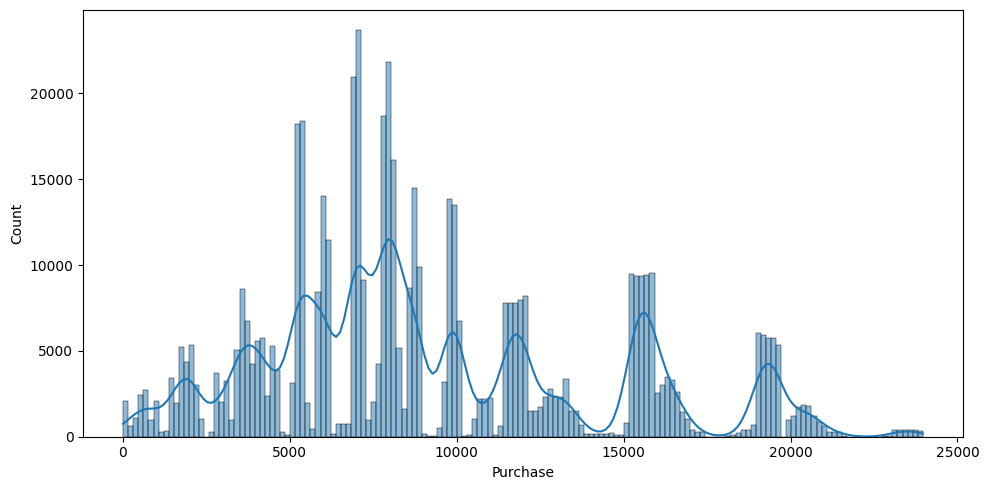

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Purchase', kde=True)
plt.tight_layout()
plt.show()

### Observation

- There is a higher count of purchase values falling within the range of 5000 to 10000

# Bivariate analysis

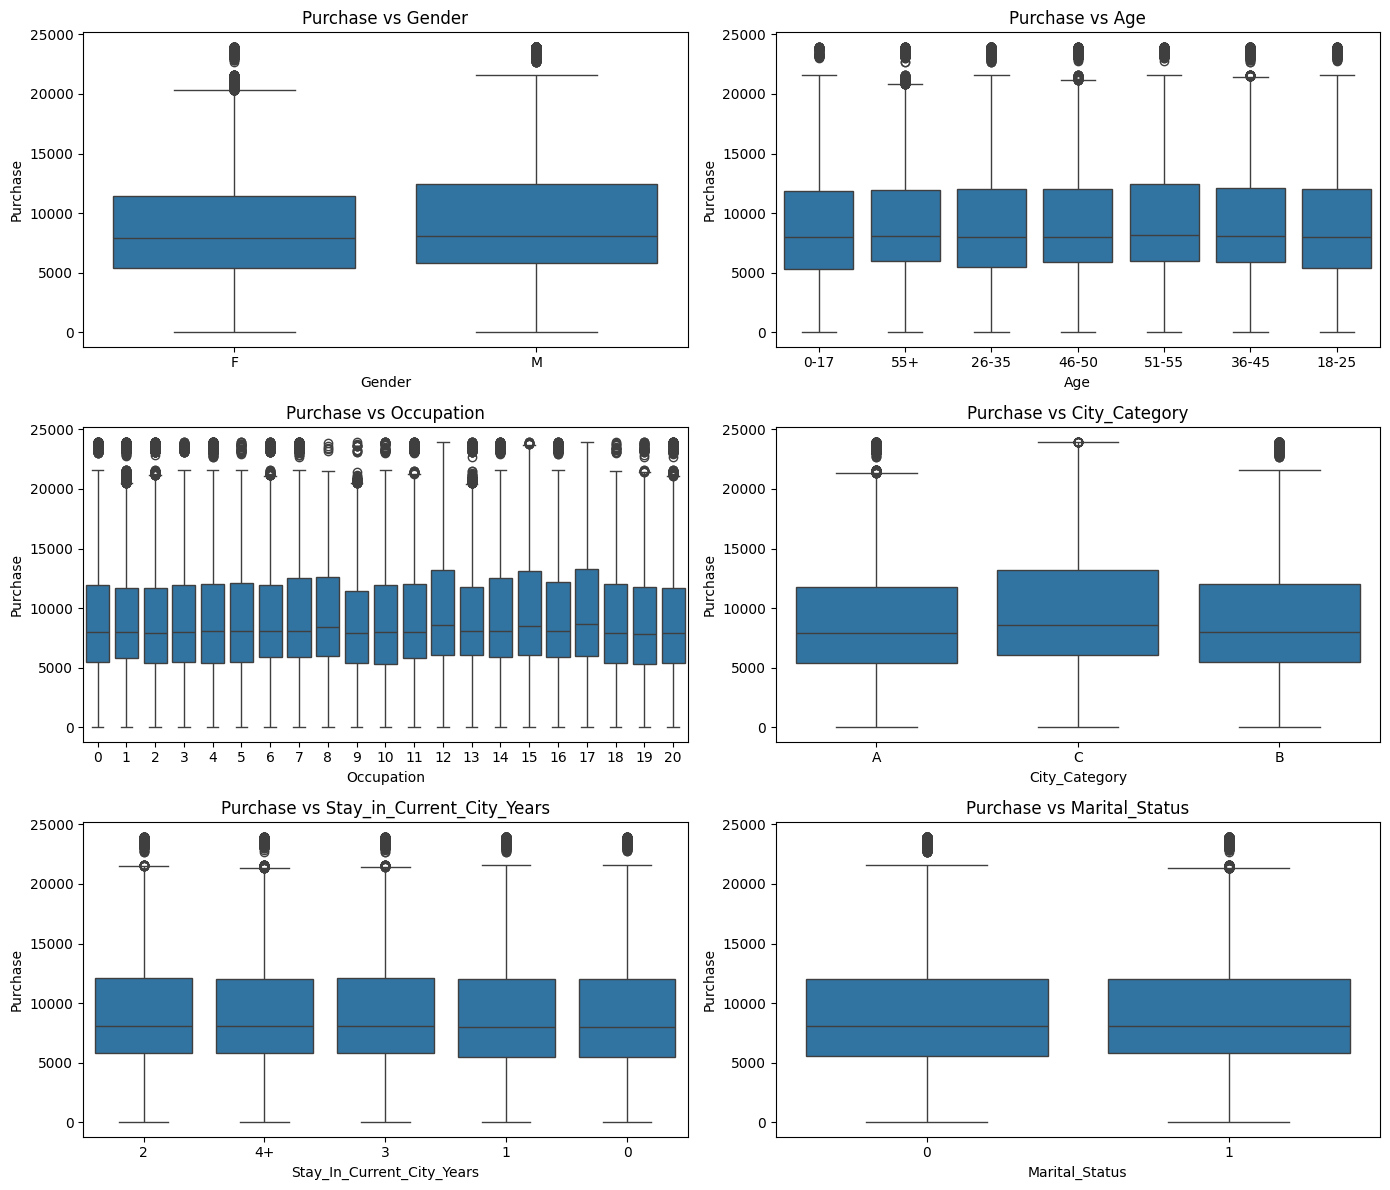

In [ ]:
fig, axis = plt.subplots(3, 2, figsize=(14,12))

sns.boxplot(data=df, y='Purchase', x='Gender', ax=axis[0, 0])
axis[0, 0].set_title('Purchase vs Gender')

sns.boxplot(data=df, y='Purchase', x='Age', ax=axis[0, 1])
axis[0, 1].set_title('Purchase vs Age')

sns.boxplot(data=df, y='Purchase', x='Occupation', ax=axis[1, 0])
axis[1, 0].set_title('Purchase vs Occupation')

sns.boxplot(data=df, y='Purchase', x='City_Category', ax=axis[1, 1])
axis[1, 1].set_title('Purchase vs City_Category')

sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', ax=axis[2, 0])
axis[2, 0].set_title('Purchase vs Stay_in_Current_City_Years')

sns.boxplot(data=df, y='Purchase', x='Marital_Status', ax=axis[2, 1])
axis[2, 1].set_title('Purchase vs Marital_Status')

plt.tight_layout()
plt.show()

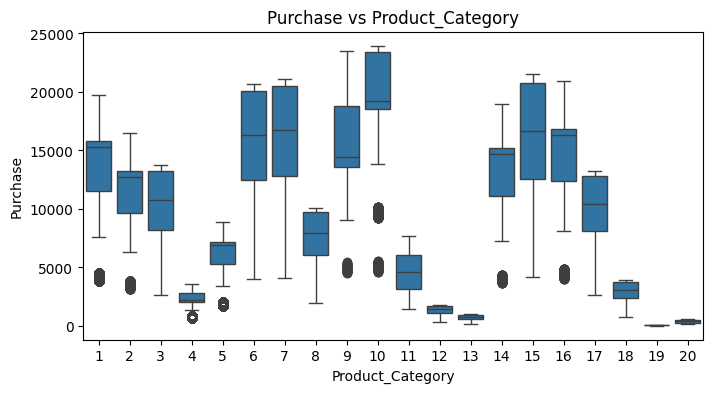

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.title('Purchase vs Product_Category')
plt.show()

### Observations
- Outliers were detected across numerous categories, signaling instances of high purchase values except Purchase vs Product_Category it contains both high and low purchase values.
- Product_Category 10 stands out with higher purchase prices compared to other categories.

# Are women spending more money per transaction than men? Why or Why not?

### Average amount spend per customer for Male and Female

In [ ]:
avg_amount = df.groupby(['User_ID','Gender'])[['Purchase']].sum()
avg_amount = avg_amount.reset_index()
avg_amount

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
avg_amount['Gender'].value_counts(normalize=True)*100

Gender
M    71.719572
F    28.280428
Name: proportion, dtype: float64

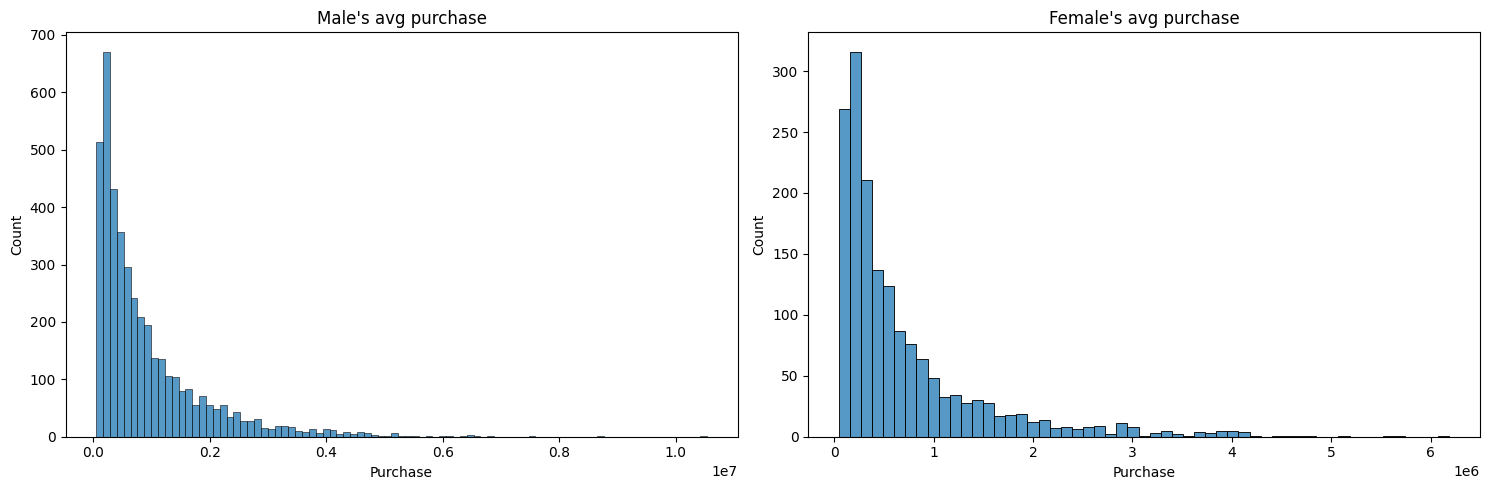

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(data=avg_amount[avg_amount['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male's avg purchase")

sns.histplot(data=avg_amount[avg_amount['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female's avg purchase")

plt.tight_layout()
plt.show()

In [ ]:
male_avg = avg_amount[avg_amount['Gender']=='M']['Purchase'].mean()
female_avg = avg_amount[avg_amount['Gender']=='F']['Purchase'].mean()

print("Average amount Male:", male_avg)
print("Average amount Female:", female_avg)

Average amount Male: 925344.4023668639
Average amount Female: 712024.3949579832


###Observation
- Average amount spend by males are higher than females.
- Average amount spend by Male customers (925344.40) and Average amount spend by Female customers(712024.39)

# Confidence intervals and distribution of the mean of the expenses by female and male customers

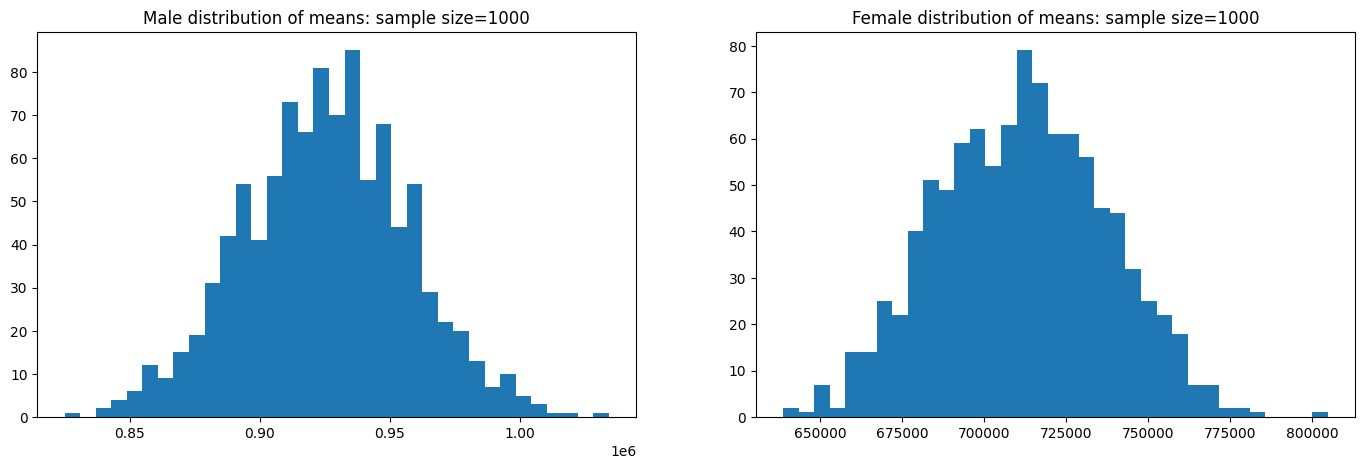

In [ ]:
df_male = avg_amount[avg_amount['Gender']=='M']
df_female = avg_amount[avg_amount['Gender']=='F']

Gender = ['M', 'F']
sample_size = 1000
num_repitition = 1000

male_means = []
female_means = []

for i in range (num_repitition):
    male_mean=df_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean=df_female.sample(sample_size, replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
axs[0].hist(male_means,  bins=35)
axs[0].set_title('Male distribution of means: sample size=1000')
axs[1].hist(female_means,  bins=35)
axs[1].set_title('Female distribution of means: sample size=1000')
plt.show()

In [ ]:
male_sample_mean = np.mean(male_means)
female_sample_mean = np.mean(female_means)

print("Mean of sample means of amount spent for Male:", male_sample_mean)
print("Mean of sample means of amount spent for Female:", female_sample_mean)

print("Male - Sample mean:", df_male['Purchase'].mean())
print("Sample std:", df_male['Purchase'].std())
print("Female - Sample mean:", df_female['Purchase'].mean())
print("Sample std:", df_female['Purchase'].std())

Mean of sample means of amount spent for Male: 925447.8675729999
Mean of sample means of amount spent for Female: 711653.704148
Male - Sample mean: 925344.4023668639
Sample std: 985830.1007953875
Female - Sample mean: 712024.3949579832
Sample std: 807370.7261464577


###Observation:

Now using the Central Limit Theorem for the population we can say that:

- Average amount spend by male customers is 925344.40
- Average amount spend by female customers is 712024.39

Confidence Interval -> Z

90% -> 1.645

95% -> 1.960

99% -> 2.576

In [ ]:
#Taking the value for z at 90% confidence interval as:
z90 = 1.645

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male = sample_std_male/np.sqrt(1000)
sample_std_error_female = sample_std_female/np.sqrt(1000)

upper_limit_male = z90*sample_std_error_male + sample_mean_male
lower_limit_male = sample_mean_male - z90*sample_std_error_male

upper_limit_female = z90*sample_std_error_female + sample_mean_female
lower_limit_female = sample_mean_female - z90*sample_std_error_female

print('Population avg spend amount for Male:', df_male['Purchase'].mean())
print('Population avg spend amount for Female:', df_female['Purchase'].mean())

print('Male- Sample mean:', sample_mean_male)
print('Female- Sample mean:', np.mean(female_means))

print('Sample std for Male:', pd.Series(male_means).std())
print('Sample std for Female:', pd.Series(female_means).std())

print('Sample std error for Male:', pd.Series(male_means).std() / np.sqrt(1000))
print('Sample std error for Female:', pd.Series(female_means).std() / np.sqrt(1000))

print('Male at 90% CI:', [lower_limit_male, upper_limit_male])
print('Female at 90% CI:', [lower_limit_female, upper_limit_female])

Population avg spend amount for Male: 925344.4023668639
Population avg spend amount for Female: 712024.3949579832
Male- Sample mean: 925447.8675729999
Female- Sample mean: 711653.704148
Sample std for Male: 31852.87777721004
Sample std for Female: 25865.364721986807
Sample std error for Male: 1007.2764380694514
Sample std error for Female: 817.9346503244618
Male at 90% CI: [923790.8978323757, 927104.8373136241]
Female at 90% CI: [710308.2016482162, 712999.2066477838]


Confidence interval at 90%, we can say that:

- Average amount spend by male customers lie in the range 922582.34 - 925713.50

- Average amount spend by female customers lie in range 711866.46 - 714533.81

In [ ]:
#Taking the value for z at 95% confidence interval as:
z95 = 1.960
upper_limit_male = z95 * sample_std_error_male + sample_mean_male
lower_limit_male = sample_mean_male - z95*sample_std_error_male

upper_limit_female = z95 * sample_std_error_female + sample_mean_female
lower_limit_female = sample_mean_female - z95*sample_std_error_female

print('Male at 95% CI: ',[lower_limit_male, upper_limit_male])
print('Female at 95% CI: ',[lower_limit_female, upper_limit_female])

Male at 95% CI:  [923473.6057543838, 927422.129391616]
Female at 95% CI:  [710050.5522333641, 713256.8560626359]


In [ ]:
#Taking the value for z at 99% confidence interval as:
z99 = 2.576
upper_limit_male = 2.576 * sample_std_error_male + sample_mean_male
lower_limit_male = sample_mean_male - 2.576 *sample_std_error_male

upper_limit_female = 2.576 * sample_std_error_female + sample_mean_female
lower_limit_female = sample_mean_female - 2.576 * sample_std_error_female

print('Male at 99% CI: ',[lower_limit_male, upper_limit_male])
print('Female at 99% CI: ',[lower_limit_female, upper_limit_female])

Male at 99% CI:  [922853.123468533, 928042.6116774668]
Female at 99% CI:  [709546.7044887642, 713760.7038072358]


# Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [ ]:
male_margin_error = 1.96*df_male['Purchase'].std()/np.sqrt(len(df_male))
male_sample_mean = df_male['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_error
male_upper_lim = male_sample_mean + male_margin_error
female_margin_error = 1.96*df_female['Purchase'].std()/np.sqrt(len(df_female))
female_sample_mean = df_female['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_error
female_upper_lim = female_sample_mean + female_margin_error
print('Male at 95% CI: ',[male_lower_lim, male_upper_lim])
print('Female at 95% CI: ',[female_lower_lim, female_upper_lim])

Male at 95% CI:  [895617.8331736492, 955070.9715600787]
Female at 95% CI:  [673254.7725364959, 750794.0173794704]


### Observation
- The average spending by male customers is expected to fall within the range of (895,617.83, 955,070.97) in 95% of cases.
- The average spending by female customers is likely to range from (673,254.77, 750,794.02) in 95% of instances.

# Results when the same activity is performed for Married vs Unmarried

In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


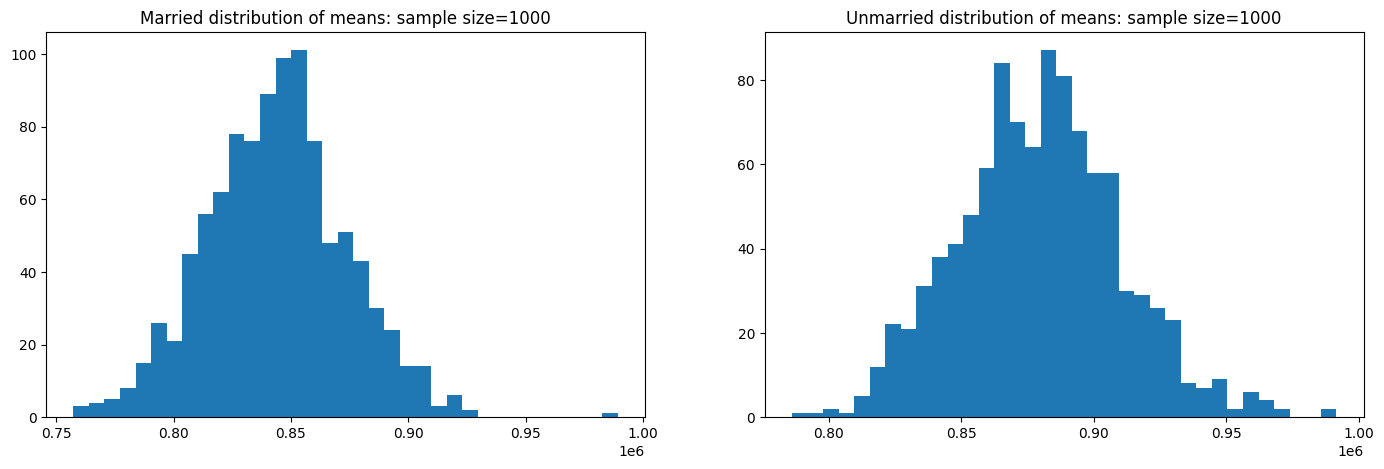

In [ ]:
#Marital wise distribution
df_married = amt_df[amt_df['Marital_Status']==1]
df_unmarried = amt_df[amt_df['Marital_Status']==0]

sample_size=1000
num_repitition =1000

married_means=[]
unmarried_means=[]

for i in range (num_repitition):
    married_mean = df_married.sample(sample_size, replace=True)['Purchase'].mean()
    unmarried_mean = df_unmarried.sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(17,5))
axs[0].hist(married_means,  bins=35)
axs[0].set_title('Married distribution of means: sample size=1000')
axs[1].hist(unmarried_means,  bins=35)
axs[1].set_title('Unmarried distribution of means: sample size=1000')
plt.show()

Confidence Interval -> Z

90% -> 1.645

95% -> 1.960

99% -> 2.576

In [ ]:
#Taking the value for z at 90% confidence interval as:
z90 = 1.645

sample_married_mean = np.mean(married_means)
sample_unmarried_mean = np.mean(unmarried_means)

sample_std_married = pd.Series(married_means).std()
sample_std_unmarried = pd.Series(unmarried_means).std()

sample_std_error_married = sample_std_married/np.sqrt(1000)
sample_std_error_unmarried = sample_std_unmarried/np.sqrt(1000)

upper_limit_married = z90 * sample_std_error_married + sample_married_mean
lower_limit_married = sample_married_mean - z90*sample_std_error_married

upper_limit_unmarried = z90 * sample_std_error_unmarried + sample_unmarried_mean
lower_limit_unmarried = sample_unmarried_mean - z90 * sample_std_error_female

print('Population avg spend amount for Married:', df_married['Purchase'].mean())
print('Population avg spend amount for Unmarried:', df_unmarried['Purchase'].mean())

print('Married_Sample mean:', sample_married_mean)
print('Unmarried_Sample mean:', sample_unmarried_mean)

print('Sample std for Married:', sample_std_married)
print('Sample std for Unmarried:', sample_std_unmarried)

print('Sample std error for Married:', sample_std_error_married)
print('Sample std error for Unmarried:', sample_std_error_unmarried)

print('Married at 90% CI:', [lower_limit_married, upper_limit_married])
print('Unmarried at 90% CI:', [lower_limit_unmarried, upper_limit_unmarried])

Population avg spend amount for Married: 843526.7966855295
Population avg spend amount for Unmarried: 880575.7819724905
Married_Sample mean: 843867.8952419999
Unmarried_Sample mean: 879470.6184149999
Sample std for Married: 29757.160836288447
Sample std for Unmarried: 30694.994076805597
Sample std error for Married: 941.0040494263237
Sample std error for Unmarried: 970.6609404808307
Married at 90% CI: [842319.9435806936, 845415.8469033062]
Unmarried at 90% CI: [878125.1159152162, 881067.3556620909]


Now using the Central Limit Theorem for the population we can say that:

- Average amount spend by married customers is 843526.80
- Average amount spend by unmarried customers is 880575.78

Confidence interval at 90%, we can say that:
- Average amount spend by married customers lie in the range 841730.05, 844797.18
- Average amount spend by unmarried customers lie in range 878937.46, 881422.35

In [ ]:
#Taking the value for z at 95% confidence interval as:
z95 = 1.960
upper_limit_married = z95 * sample_std_error_married + sample_married_mean
lower_limit_married = sample_married_mean - z95 * sample_std_error_married

upper_limit_unmarried = z95 * sample_std_error_unmarried + sample_unmarried_mean
lower_limit_unmarried = sample_unmarried_mean - z95 * sample_std_error_female

print('Married at 95% CI: ',[lower_limit_married, upper_limit_married])
print('Unmarried at 95% CI: ',[lower_limit_unmarried, upper_limit_unmarried])

Married at 95% CI:  [842023.5273051243, 845712.2631788754]
Unmarried at 95% CI:  [877867.466500364, 881373.1138583424]


Confidence interval at 90%, we can say that:
- Average amount spend by married customers lie in the range 842023.52, 845712.26
- Average amount spend by unmarried customers lie in range 877867.46, 881373.11

In [ ]:
#Taking the value for z at 99% confidence interval as:
z99 = 2.576
upper_limit_married = z99 * sample_std_error_married + sample_married_mean
lower_limit_married = sample_married_mean - z99 * sample_std_error_married

upper_limit_unmarried = z99 * sample_std_error_unmarried + sample_unmarried_mean
lower_limit_unmarried = sample_unmarried_mean - z99 * sample_std_error_female

print('Married at 99% CI: ',[lower_limit_married, upper_limit_married])
print('Unmarried at 99% CI: ',[lower_limit_unmarried, upper_limit_unmarried])

Married at 99% CI:  [841443.8688106777, 846291.9216733221]
Unmarried at 99% CI:  [877363.6187557641, 881971.0409976785]


Confidence interval at 90%, we can say that:
- Average amount spend by married customers lie in the range 841443.86, 846291.92
- Average amount spend by unmarried customers lie in range 877363.61, 881971.04

# Results when the same activity is performed for Age

In [ ]:
avg_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avg_age = avg_age.reset_index()
avg_age

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


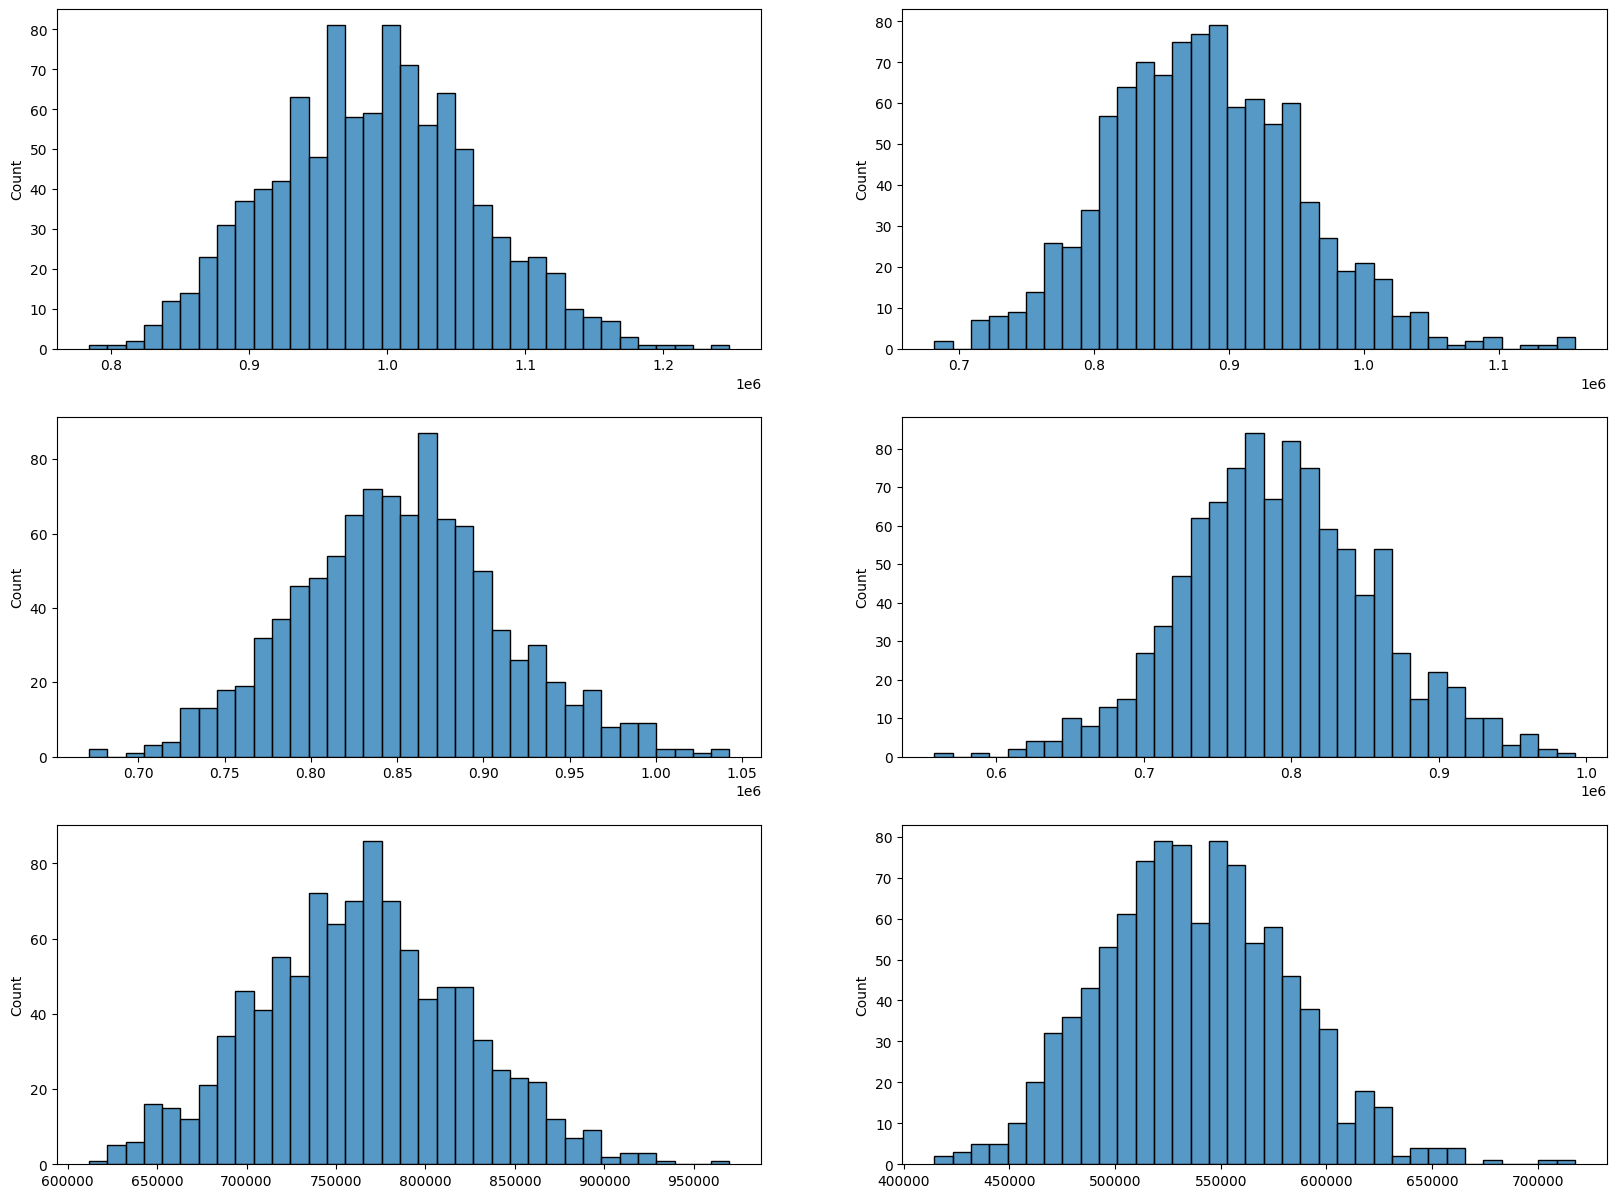

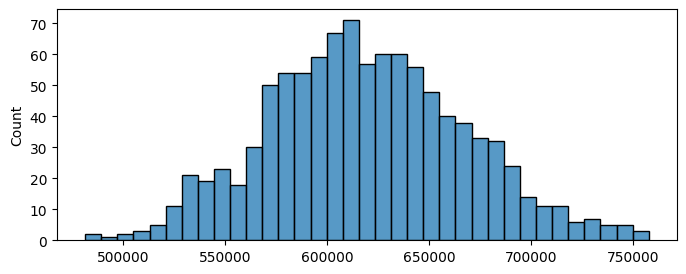

In [ ]:
samp_size=200
num_repitition =1000

age_means={}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    age_means[i] = []

for i in age_intervals:
    for j in range(num_repitition):
        mean = avg_age[avg_age['Age']==i].sample(samp_size, replace=True)['Purchase'].mean()
        age_means[i].append(mean)

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(age_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(age_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(age_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(age_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(age_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(age_means['55+'],bins=35,ax=axis[2,1])

plt.figure(figsize=(8, 3))
sns.histplot(age_means['0-17'],bins=35)
plt.show()

In [ ]:
population_means = {}
for i in age_intervals:
    population_means[i] = []
    population_m = avg_age[avg_age['Age']==i]['Purchase'].mean()
    population_means[i].append(population_m)
    print("Population mean for age group '{}':".format(i), population_m)

Population mean for age group '26-35': 989659.3170969313
Population mean for age group '36-45': 879665.7103684661
Population mean for age group '18-25': 854863.119738073
Population mean for age group '46-50': 792548.7815442561
Population mean for age group '51-55': 763200.9230769231
Population mean for age group '55+': 539697.2446236559
Population mean for age group '0-17': 618867.8119266055


Confidence interval at 90%

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    df_age = avg_age[avg_age['Age'] == val]

    std_error = z90*df_age['Purchase'].std()/np.sqrt(len(df_age))
    sample_mean = df_age['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error
    print("For age {} 90% CI of means: ({}, {})".format(val, lower_lim, upper_lim))

For age 26-35 90% CI of means: (952206.2815243808, 1027112.3526694818)
For age 36-45 90% CI of means: (832398.8945306641, 926932.5262062681)
For age 18-25 90% CI of means: (810187.6519911229, 899538.5874850231)
For age 46-50 90% CI of means: (726208.9973711706, 858888.5657173417)
For age 51-55 90% CI of means: (703772.3623390207, 822629.4838148255)
For age 55+ 90% CI of means: (487032.9178994713, 592361.5713478405)
For age 0-17 90% CI of means: (542320.460230406, 695415.163622805)


Confidence interval at 95%

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    df_age = avg_age[avg_age['Age'] == val]

    std_error = z95*df_age['Purchase'].std()/np.sqrt(len(df_age))
    sample_mean = df_age['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error
    print("For age {} 95% CI of means: ({}, {})".format(val, lower_lim, upper_lim))

For age 26-35 95% CI of means: (945034.4236487859, 1034284.2105450766)
For age 36-45 95% CI of means: (823347.8021361914, 935983.6186007408)
For age 18-25 95% CI of means: (801632.7751885153, 908093.4642876306)
For age 46-50 95% CI of means: (713505.6344444095, 871591.9286441028)
For age 51-55 95% CI of means: (692392.4251764436, 834009.4209774026)
For age 55+ 95% CI of means: (476948.2595905849, 602446.2296567269)
For age 0-17 95% CI of means: (527662.4567141125, 710073.1671390985)


Confidence interval at 99%


In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    df_age = avg_age[avg_age['Age'] == val]

    std_error = z99*df_age['Purchase'].std()/np.sqrt(len(df_age))
    sample_mean = df_age['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error
    print("For age {} 99% CI of means: ({}, {})".format(val, lower_lim, upper_lim))


For age 26-35 99% CI of means: (931009.4571365117, 1048309.1770573509)
For age 36-45 99% CI of means: (805647.8881203335, 953683.5326165986)
For age 18-25 99% CI of means: (784903.238330083, 924823.001146063)
For age 46-50 99% CI of means: (688663.5024987434, 896434.0605897689)
For age 51-55 99% CI of means: (670138.3258362929, 856263.5203175533)
For age 55+ 99% CI of means: (457227.1500087626, 622167.3392385492)
For age 0-17 99% CI of means: (498997.9165044719, 738737.7073487391)


###Observation
- The 26-35 age group emerges as the highest spender, suggesting a lucrative market segment for premium products and services.
- Conversely, individuals aged 55 and above exhibit the lowest average spending, indicating a potential demand for more economical options.
- Age brackets of 26-35 and 36-45, showing comparatively higher expenditure, represent valuable demographics for sustained business growth.
- Despite being younger, the 18-25 age group demonstrates substantial spending, presenting an opportunity for long-term customer engagement and loyalty.
- Tailoring marketing strategies towards the 26-35 age group may prioritize high-value offerings, while those targeting the 55+ age group could emphasize affordability and convenience.
- Products catering to luxury and premium segments may align with preferences of the 26-35 age bracket.
- Continuous monitoring of population means can serve as a predictive tool for identifying evolving consumer trends.

# Insights
- Male consumers tend to spend more than females, with marital status influencing purchasing behavior significantly.
- Unmarried individuals emerge as the primary spenders, particularly unmarried males and married females.
- Product Category 5 appeals more to females, while men show a preference for Product Category 1, allowing for effective customer segmentation.
- Walmart can optimize inventory by stocking popular products like P00265242 and P00025442 while considering discontinuing slow-selling items such as P00056342 and P00350742.
- Targeted advertisements can focus on the 26–35 age group, which represents the highest spending demographic.
- Cities categorized as B show potential for increased sales, warranting inventory replenishment and targeted advertising efforts.
- Products from categories 1, 5, and 8 should be prioritized in inventory and prominently displayed in stores.
- Occupation groups 12 and 17 may be receptive to ads for slightly higher-priced products, allowing for tailored marketing strategies.

# Recommendations
- Prioritize strategies targeting male customers, who demonstrate higher spending habits compared to females, to optimize revenue and customer retention.
- Implement a rewards program incentivizing customers to spend more, fostering loyalty and encouraging higher-value transactions.
- Focus advertising efforts on customers from City Type B with a one-year residency, as they exhibit favorable spending patterns, potentially boosting sales and engagement.
- Target unmarried males and married females with tailored advertisements to attract new customers and enhance existing customer engagement.
- Promote products in high-demand categories 1, 5, and 8 to capitalize on consumer preferences and increase sales.
- Expand product offerings and marketing efforts in City_Category C, targeting male customers, to leverage higher spending propensity and drive revenue growth.
- Consider discontinuing products with low purchase activity, such as categories 19, 20, and 13, to streamline inventory.
- Prioritize top-selling products to maintain quality and further increase sales.
- Explore partnerships with financial institutions to offer benefits to customers in high-contributing occupation categories, enhancing sales and loyalty.